<img src="https://i.imgur.com/49FNOHj.jpg">

# Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Exploration

How many different colours does the LEGO company produce?

In [2]:
colors = pd.read_csv('/kaggle/input/lego-database/colors.csv')
colors.head()

,id,name,rgb,is_trans
0,-1,Unknown,0033B2,f
1,0,Black,05131D,f
2,1,Blue,0055BF,f
3,2,Green,237841,f
4,3,Dark Turquoise,008F9B,f


In [3]:
colors['name'].nunique()

135

In [4]:
colors.groupby('is_trans').count()

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


In [5]:
colors.is_trans.value_counts()

f    107
t     28
Name: is_trans, dtype: int64

### Understanding LEGO Themes vs. LEGO Sets

Walk into a LEGO store and you will see their products organised by theme. Their themes include Star Wars, Batman, Harry Potter and many more.

<img src="https://i.imgur.com/aKcwkSx.png">

A lego **set** is a particular box of LEGO or product. Therefore, a single theme typically has many different sets.

<img src="https://i.imgur.com/whB1olq.png">

The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.

In [6]:
sets = pd.read_csv('/kaggle/input/lego-database/sets.csv')
sets.head()

,set_num,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1970,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [7]:
sets.tail()

,set_num,name,year,theme_id,num_parts
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",2012,408,15
11669,WHITEHOUSE-1,Micro White House,2015,598,59
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
11671,WishingWell-1,Wishing Well [Toys R Us Promo],2013,494,28
11672,wwgp1-1,Wild West Limited Edition Gift Pack,1996,476,3


In which year were the first LEGO sets released and what were these sets called?

In [8]:
sets.sort_values('year').head()

,set_num,name,year,theme_id,num_parts
6935,700.1.1-1,Individual 2 x 4 Bricks,1950,371,10
6938,700.1.2-1,Individual 2 x 2 Bricks,1950,371,9
6956,700.B.1-1,Individual 1 x 4 x 2 Window (without glass),1950,371,7
6957,700.B.2-1,Individual 1 x 2 x 3 Window (without glass),1950,371,7
6959,700.B.4-1,Individual 1 x 2 x 4 Door (without glass),1950,371,7


How many different sets did LEGO sell in their first year? How many types of LEGO products were on offer in the year the company started?

In [9]:
sets[sets['year'] == 1949]

,set_num,name,year,theme_id,num_parts


Find the top 5 LEGO sets with the most number of parts. 

In [10]:
sets.sort_values('num_parts', ascending=False).head()

,set_num,name,year,theme_id,num_parts
170,10189-1,Taj Mahal,2008,276,5922
11614,SWMP-1,Star Wars / M&M Mosaic - Promo Set,2005,169,5461
1337,2000409-1,Window Exploration Bag,2010,507,5200
161,10179-1,Millennium Falcon - UCS,2007,174,5195
8322,75827-1,Firehouse Headquarters,2016,301,4640


Use <code>.groupby()</code> and <code>.count()</code> to show the number of LEGO sets released year-on-year. How do the number of sets released in 1955 compare to the number of sets released in 2019? 

In [11]:
sets_by_year = sets.groupby('year').count()
sets_by_year['set_num'].head()

year
1950     7
1953     4
1954    14
1955    28
1956    12
Name: set_num, dtype: int64

In [12]:
sets_by_year['set_num'].tail()

year
2013    593
2014    713
2015    665
2016    596
2017    296
Name: set_num, dtype: int64

Show the number of LEGO releases on a line chart using Matplotlib. <br>
<br>
Note that the .csv file is from late 2020, so to plot the full calendar years, you will have to exclude some data from your chart. Can you use the slicing techniques covered in Day 21 to avoid plotting the last two years? The same syntax will work on Pandas DataFrames. 

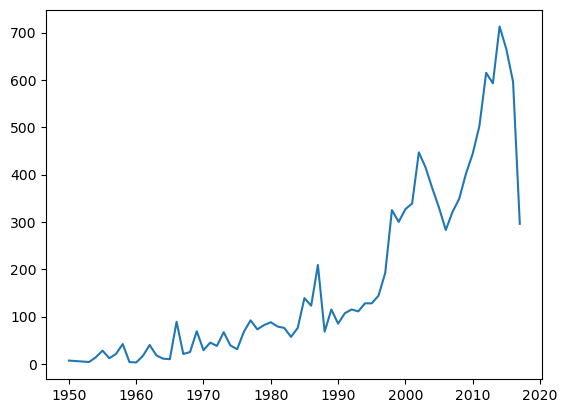

In [13]:
plt.plot(sets_by_year.index, sets_by_year.set_num)

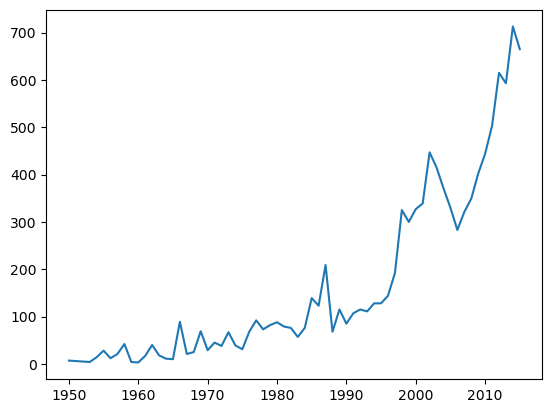

In [14]:
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

### Aggregate Data with the Python .agg() Function

Let's work out the number of different themes shipped by year. This means we have to count the number of unique theme_ids per calendar year.

In [15]:
themes_by_year = sets.groupby('year').agg({'theme_id': pd.Series.nunique})

In [16]:
themes_by_year.rename(columns = {'theme_id':'nr_themes'}, inplace = True) 
themes_by_year.head()

,nr_themes
year,
1950,2
1953,1
1954,2
1955,4
1956,3


In [17]:
themes_by_year.tail()

,nr_themes
year,
2013,93
2014,92
2015,98
2016,86
2017,57


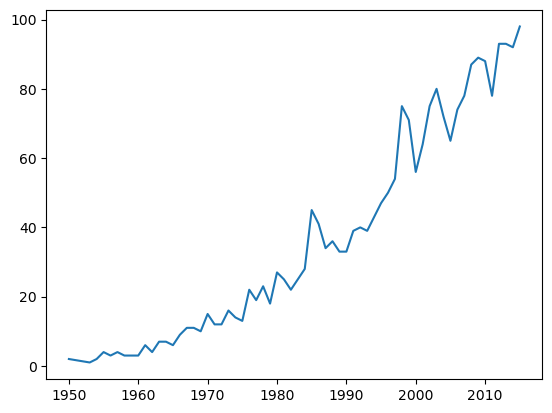

In [18]:
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

### Line Charts with Two Seperate Axes

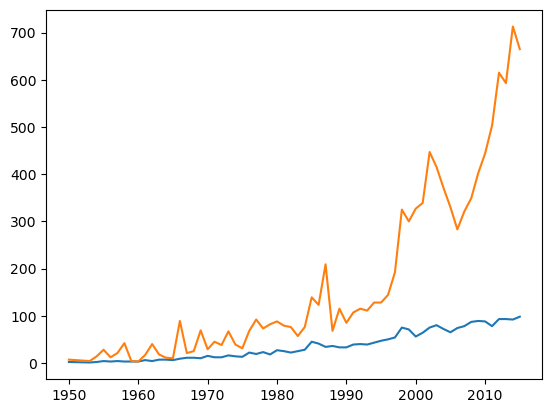

In [19]:
# This looks terrible
plt.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])
plt.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])

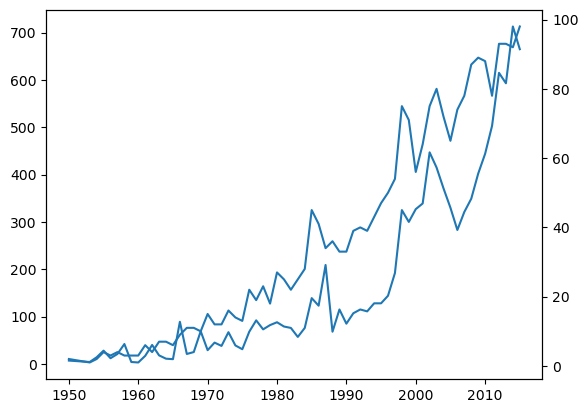

In [20]:
ax1 = plt.gca() # get the axis
ax2 = ax1.twinx() # create another axis that shares the same x-axis

ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2])
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2])

Text(0, 0.5, 'Number of Themes')

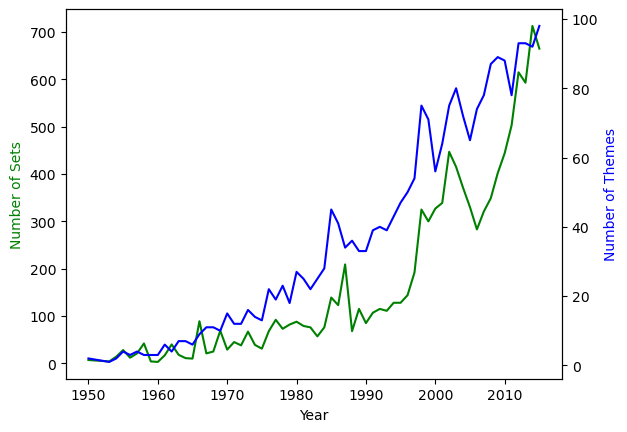

In [21]:
ax1 = plt.gca()
ax2 = ax1.twinx()

# Add styling
ax1.plot(sets_by_year.index[:-2], sets_by_year.set_num[:-2], color='g')
ax2.plot(themes_by_year.index[:-2], themes_by_year.nr_themes[:-2], 'b')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Sets', color='green')
ax2.set_ylabel('Number of Themes', color='blue')

In [22]:
parts_per_set = sets.groupby('year').agg({'num_parts': pd.Series.mean})
parts_per_set.head()

,num_parts
year,
1950,10.142857
1953,16.500000
1954,12.357143
1955,36.857143
1956,18.500000


In [23]:
parts_per_set.tail()

,num_parts
year,
2013,181.344013
2014,169.715288
2015,201.669173
2016,253.077181
2017,260.820946


### Scatter Plots in Matplotlib

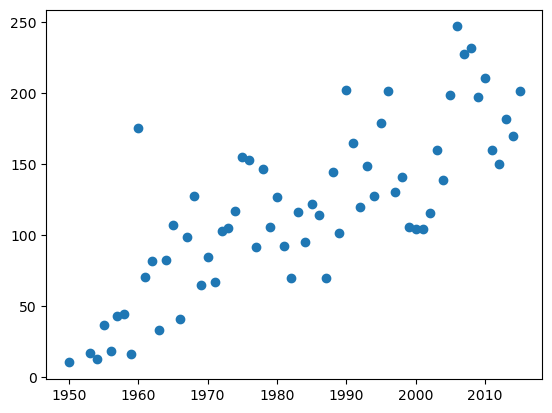

In [24]:
plt.scatter(parts_per_set.index[:-2], parts_per_set.num_parts[:-2])

### Number of Sets per LEGO Theme

LEGO has licensed many hit franchises from Harry Potter to Marvel Super Heros to many others. But which theme has the largest number of individual sets? Is it one of LEGO's own themes like Ninjago or Technic or is it a third party theme? Let's analyse LEGO's product lines!

In [25]:
set_theme_count = sets["theme_id"].value_counts()
set_theme_count[:5]

501    246
371    240
504    219
220    216
494    192
Name: theme_id, dtype: int64

<img src="https://i.imgur.com/Sg4lcjx.png">

### Database Schemas, Foreign Keys and Merging DataFrames

The themes.csv file has the actual theme names. The sets .csv has <code>theme_ids</code> which link to the <code>id</code> column in the themes.csv.

In [26]:
themes = pd.read_csv('/kaggle/input/lego-database/themes.csv') # has the theme names!
themes.head()

,id,name,parent_id
0,1,Technic,NaN
1,2,Arctic Technic,1.0
2,3,Competition,1.0
3,4,Expert Builder,1.0
4,5,Model,1.0


In [27]:
themes[themes.name == 'Star Wars']

,id,name,parent_id
17,18,Star Wars,1.0
157,158,Star Wars,NaN
208,209,Star Wars,207.0
224,225,Star Wars,217.0
260,261,Star Wars,258.0
430,431,Star Wars,425.0


In [28]:
sets[sets.theme_id == 18]

,set_num,name,year,theme_id,num_parts
6283,65081-1,R2-D2 8009 / C-3PO 8007 Droid Collectors Set,2002,18,3
11301,K8008-1,Darth Vader / Stormtrooper Kit,2002,18,2


In [29]:
sets[sets.theme_id == 209]

,set_num,name,year,theme_id,num_parts
7990,75023-1,"Advent Calendar 2013, Star Wars",2013,209,24
8046,75056-1,Advent Calendar 2014 Star Wars,2014,209,24
8154,75146-1,Advent Calendar 2016 Star Wars,2016,209,282
8946,7958-1,Advent Calendar 2011 Star Wars,2011,209,25
10624,9509-1,"Advent Calendar 2012, Star Wars",2012,209,25


### Merging (i.e., Combining) DataFrames based on a Key


In [30]:
set_theme_count = pd.DataFrame({'id':set_theme_count.index, 
                                'set_count':set_theme_count.values})
set_theme_count.head()

,id,set_count
0,501,246
1,371,240
2,504,219
3,220,216
4,494,192


In [31]:
merged_df = pd.merge(set_theme_count, themes, on='id')
merged_df[:3]

,id,set_count,name,parent_id
0,501,246,Gear,NaN
1,371,240,Supplemental,365.0
2,504,219,Duplo,NaN


<BarContainer object of 10 artists>

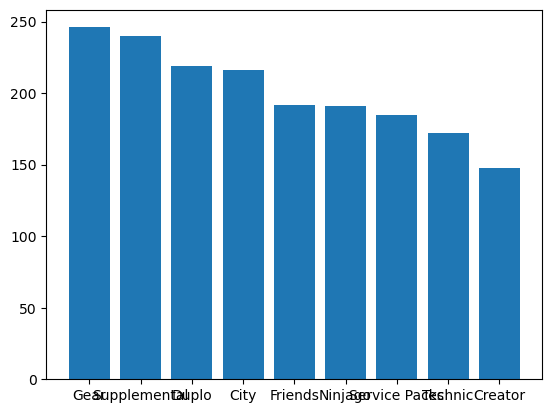

In [32]:
# Basic, but unreadable
plt.bar(merged_df.name[:10], merged_df.set_count[:10])

<BarContainer object of 10 artists>

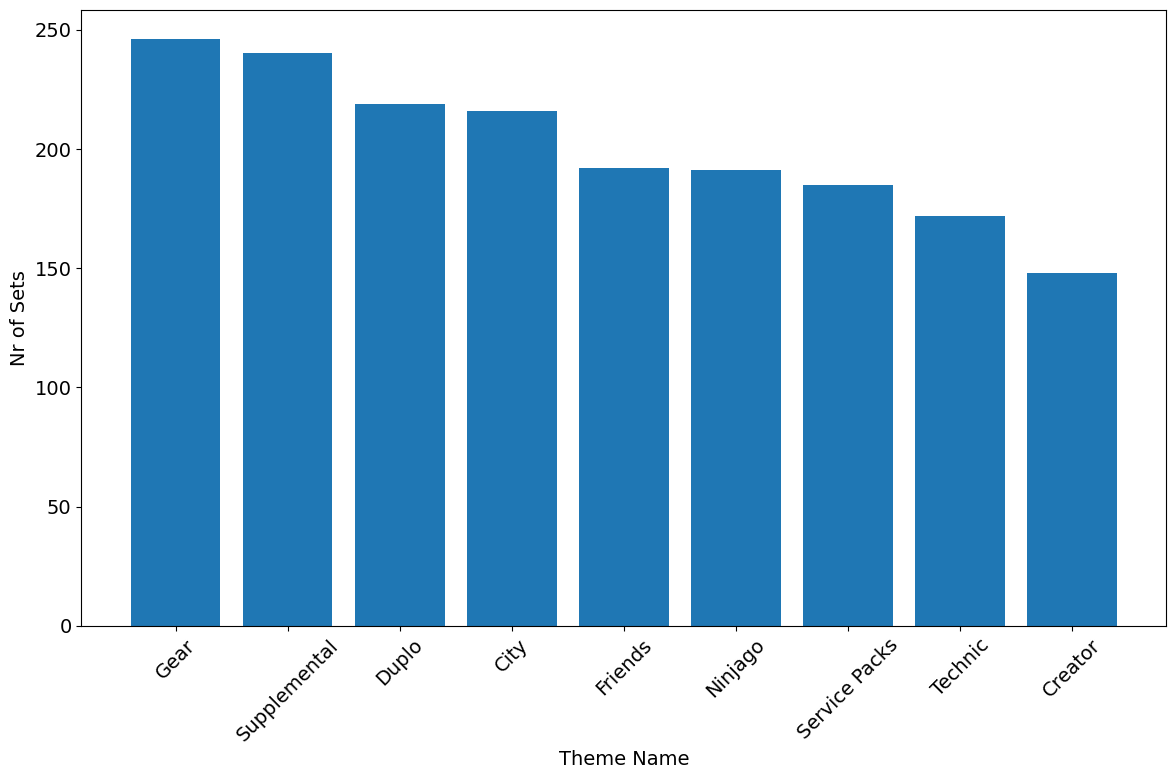

In [33]:
plt.figure(figsize=(14,8))
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)
plt.ylabel('Nr of Sets', fontsize=14)
plt.xlabel('Theme Name', fontsize=14)

plt.bar(merged_df.name[:10], merged_df.set_count[:10])

